In [1]:
import pybamm
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)

########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

In [2]:
model = pybamm.lithium_sulfur.Cornish()
current = .36/5
hours = 10
time_in_seconds = 15000#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Lower voltage cut-off [V]": 2.0,
        "Standard Potential L [V]": 2.0,
        "Standard Potential M [V]": 2.1,
        "Standard Potential H [V]": 2.38,
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

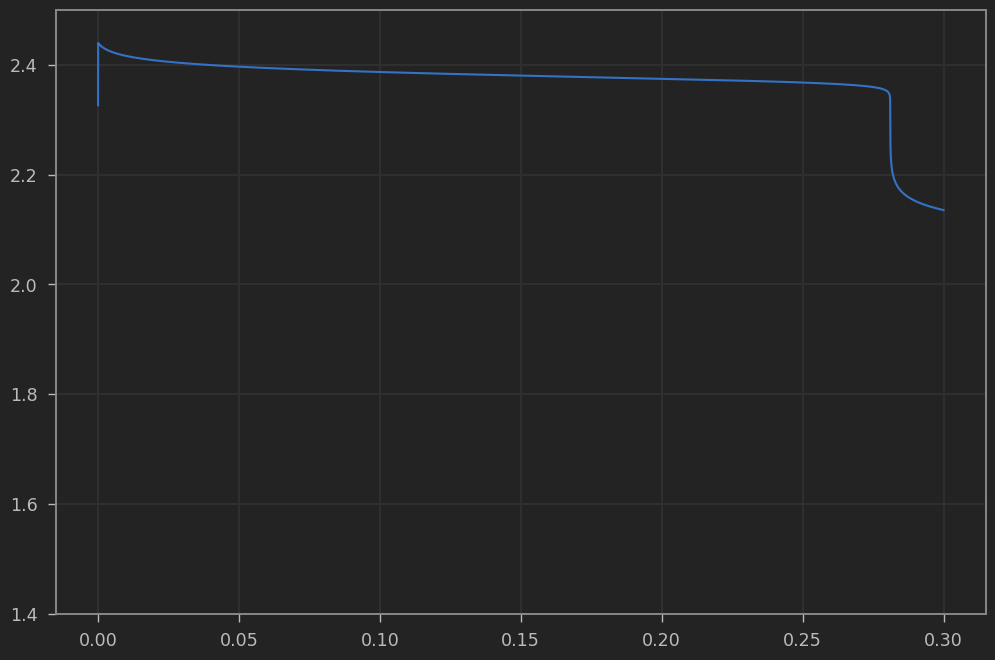

In [3]:
voltage = sim1.solution['Terminal voltage [V]'].entries
capacity = abs(current)*sim1.solution.t/3600
plt.plot(capacity,voltage)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
#plt.xlim([0,0.211])
plt.grid(True)
notify

In [4]:
indices = np.where(voltage <= 2.4)
loc = indices[0][0]
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]

In [5]:
model = pybamm.lithium_sulfur.Cornish()
current = 2.3*.15#/5
hours = 10
time_in_seconds = 4500#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 1.88,
        "Standard Potential L [V]": 1.8,
        "Standard Potential M [V]": 1.9,
        "Standard Potential H [V]": 2.38,
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim1 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim1.solve(np.linspace(0, time_in_seconds, 10000))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

SystemError: <built-in function integrator> returned a result with an error set

In [ ]:
voltage = sim1.solution['Terminal voltage [V]'].entries
capacity = abs(current)*sim1.solution.t/3600
plt.plot(capacity,voltage)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
#plt.xlim([0,0.211])
plt.grid(True)
notify

In [ ]:
sim1.solution.t[-1]

In [ ]:
S8 = sim1.solution['S8 [g]'].entries
S6 = sim1.solution['S6 [g]'].entries
S4 = sim1.solution['S4 [g]'].entries
S2 = sim1.solution['S2 [g]'].entries
S1 = sim1.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6 
plt.plot(capacity,Li)

In [ ]:
plt.plot(capacity, S2)
plt.plot(capacity, S1)

In [ ]:
loc = -1
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]

In [ ]:
model = pybamm.lithium_sulfur.Cornish()
current = 2.3*.15#/5
hours = 10
time_in_seconds = 3500#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        #"Precipitation rate [s-1]": 5,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 1.88,
        "Standard Potential L [V]": 1.8,
        "Standard Potential M [V]": 1.9,
        "Standard Potential H [V]": 2.38,
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim2 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim2.solve(np.linspace(0, time_in_seconds, 100))

In [ ]:
voltage2 = sim2.solution['Terminal voltage [V]'].entries
capacity2 = abs(current)*sim2.solution.t/3600
plt.plot(capacity,voltage)
plt.plot(capacity[-1]+capacity2,voltage2)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
#plt.xlim([0,0.211])
plt.grid(True)
notify

In [ ]:
S6 = sim1.solution['S6 [g]'].entries
S4 = sim1.solution['S4 [g]'].entries
S2 = sim1.solution['S2 [g]'].entries
S1 = sim1.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6

peak = max(Li)*1.1

plt.plot(capacity,1/(peak - Li))


S6 = sim2.solution['S6 [g]'].entries
S4 = sim2.solution['S4 [g]'].entries
S2 = sim2.solution['S2 [g]'].entries
S1 = sim2.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6

plt.plot(capacity[-1]+capacity2,1/(peak - Li))

In [ ]:
np.array(S1)

In [ ]:
indices = np.where(voltage <= 2.4)
loc = indices[0][1]
# extract initial conditon
S8_initial = sim1.solution['S8 [g]'].entries[loc]
S6_initial = sim1.solution['S6 [g]'].entries[loc]
S4_initial = sim1.solution['S4 [g]'].entries[loc]
S2_initial = sim1.solution['S2 [g]'].entries[loc]
S_initial = sim1.solution['S [g]'].entries[loc]
Sp_initial = sim1.solution["Precipitated Sulfur [g]"].entries[loc]
V_initial = sim1.solution['Terminal voltage [V]'].entries[loc]


print(S8_initial)
print(S6_initial)
print(S4_initial)
print(S2_initial)
print(S_initial)
print(Sp_initial)
print(V_initial)

In [ ]:
model = pybamm.lithium_sulfur.Cornish()
current = 2.3*.15#/5
hours = 10
time_in_seconds = 10000#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": S8_initial,
        "Initial Condition for S6 ion [g]": S6_initial,
        "Initial Condition for S4 ion [g]": S4_initial,
        "Initial Condition for S2 ion [g]": S2_initial,
        "Initial Condition for S ion [g]": S_initial,
        "Initial Condition for Precipitated Sulfur [g]": Sp_initial,
        "Initial Condition for Terminal Voltage [V]": V_initial,
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 1.9,
        "Standard Potential L [V]": 1.9,
        "Standard Potential M [V]": 1.95,
        "Standard Potential H [V]": 2.38,
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim2 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim2.solve(np.linspace(0, time_in_seconds, 1000))

In [ ]:
voltage = sim2.solution['Terminal voltage [V]'].entries
capacity = abs(current)*sim2.solution.t/3600
plt.plot(capacity,voltage)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
#plt.xlim([0,0.211])
plt.grid(True)
plt.xticks(np.linspace(0,capacity[-1],20))
plt.tick_params(rotation = 45)
notify

In [ ]:
S6 = sim2.solution['S6 [g]'].entries
S4 = sim2.solution['S4 [g]'].entries
S2 = sim2.solution['S2 [g]'].entries
S1 = sim2.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 + (1/6)*S6
peak = max(Li)*1.1

plt.plot(capacity,1/(peak-Li))

In [ ]:
S8 = sim2.solution['S8 [g]'].entries
S6 = sim2.solution['S6 [g]'].entries
S4 = sim2.solution['S4 [g]'].entries
S2 = sim2.solution['S2 [g]'].entries
S1 = sim2.solution['S [g]'].entries
Sp = sim2.solution['Precipitated Sulfur [g]'].entries

plt.plot(capacity,S8)
plt.plot(capacity,S6)
plt.plot(capacity,S4)
plt.plot(capacity,S2)
plt.plot(capacity,S1)
plt.plot(capacity,Sp)

plt.legend(['S8','S6','S4','S2','S1','Sp'])

plt.axvline(0.2,color = 'red')
plt.axvline(0.2475,color = 'red')
plt.axvline((.2969+.2475)/2,color = 'red')

In [ ]:
m_s_hunt = .168*3

m_s_M = S8_initial + S6_initial + S4_initial + S2_initial + S_initial + Sp_initial

S8_initial_frac_M  = S8_initial/m_s_M
S6_initial_frac_M  = S6_initial/m_s_M
S4_initial_frac_M  = S4_initial/m_s_M
S2_initial_frac_M  = S2_initial/m_s_M
S1_initial_frac_M  = S_initial/m_s_M
Sp_initial_frac_M  = Sp_initial/m_s_M

S8_initial_hunt = S8_initial_frac_M*m_s_hunt
S6_initial_hunt = S6_initial_frac_M*m_s_hunt
S4_initial_hunt = S4_initial_frac_M*m_s_hunt
S2_initial_hunt = S2_initial_frac_M*m_s_hunt
S1_initial_hunt = S1_initial_frac_M*m_s_hunt
Sp_initial_hunt = Sp_initial_frac_M*m_s_hunt
V_initial_hunt = 2.4

# these are global variables to avoid needing to input them 
# we are not fitting initial conditions yet
discharge_initial_data = [V_initial_hunt, 
        S8_initial_hunt, 
        S6_initial_hunt,
        S4_initial_hunt, 
        S2_initial_hunt, 
        S1_initial_hunt, 
        Sp_initial_hunt]

In [ ]:
model = pybamm.lithium_sulfur.Cornish()
current = 0.0211*2#2.3*.15#/5
hours = 10
time_in_seconds = 20000#hours*3600
# (similar) parameters should be the same as in Marinescu et al. (2018)
# However, the  initial condition from charge appears to be the result of a discharge
params = model.default_parameter_values
params.update(
    {
        "Current function [A]": current,
        "Initial Condition for S8 ion [g]": discharge_initial_data[1],
        "Initial Condition for S6 ion [g]": discharge_initial_data[2],
        "Initial Condition for S4 ion [g]": discharge_initial_data[3],
        "Initial Condition for S2 ion [g]": discharge_initial_data[4],
        "Initial Condition for S ion [g]": discharge_initial_data[5],
        "Initial Condition for Precipitated Sulfur [g]": discharge_initial_data[6],
        "Initial Condition for Terminal Voltage [V]": 2.5,#discharge_initial_data[0],
        #"Precipitation rate [s-1]": 50,
        #"Shuttle rate coefficient during discharge [s-1]": 0.0002,
        "Lower voltage cut-off [V]": 1.9,
        "Standard Potential L [V]": 1.9,
        "Standard Potential M [V]": 1.95,
        "Standard Potential H [V]": 2.38,
        #"S saturation mass [g]": 1e-5,
        #"Electrolyte volume per cell [L]": 0.0114*.25
    }
)
params.process_model(model)
sim2 = pybamm.Simulation(
    model,
    parameter_values=params,
    solver=pybamm.CasadiSolver(
        atol=1e-6, 
        rtol=1e-3, 
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
        #root_method = 'lm',
        #root_tol = 1e-7, 
        #dt_max = 1e-7
    ),
)
sim2.solve(np.linspace(0, time_in_seconds, 1000))

In [ ]:
voltage = sim2.solution['Terminal voltage [V]'].entries
capacity = abs(current)*sim2.solution.t/3600
plt.plot(capacity,voltage)
#plt.plot(voltage312)
plt.ylim([1.4,2.5])
#plt.xlim([0,0.211])
plt.grid(True)
plt.xticks(np.linspace(0,capacity[-1],20))
plt.tick_params(rotation = 45)
notify